In [17]:
import pandas as pd
import plotly.express as px

# Load the dataset
df = pd.read_csv('restaurants_data/popular_restaurants.csv')

import ast
df['categories'] = df['categories'].apply(ast.literal_eval)
df['coordinates'] = df['coordinates'].apply(ast.literal_eval)


category_aliases = {
    'Indian': ['indpak'],
    'Italian': ['italian', 'abruzzese', 'altoatesine', 'apulian', 'calabrian', 'cucinacampana', 'emilian', 'friulan', 'ligurian', 'lumbard', 'napoletana', 'piemonte', 'roman', 'sardinian', 'sicilian', 'tuscan', 'venetian'],
    'Mexican': ['mexican', 'easternmexican', 'jaliscan', 'northernmexican', 'oaxacan', 'pueblan', 'tacos', 'tamales', 'yucatan'],
    'Chinese': ['chinese', 'cantonese', 'congee', 'dimsum', 'fuzhou', 'hainan', 'hakka', 'henghwa', 'hokkien', 'hunan', 'pekinese', 'shanghainese', 'szechuan', 'teochew'],
    'Japanese': ['japanese', 'blowfish', 'conveyorsushi', 'donburi', 'gyudon', 'oyakodon', 'handrolls', 'horumon', 'izakaya', 'japacurry', 'kaiseki', 'kushikatsu', 'oden', 'okinawan', 'okonomiyaki', 'onigiri', 'ramen', 'robatayaki', 'soba', 'sukiyaki', 'takoyaki', 'tempura', 'teppanyaki', 'tonkatsu', 'udon', 'unagi', 'westernjapanese', 'yakiniku', 'yakitori']
}

# Function to determine the main category of a restaurant based on its categories
def determine_main_category(categories):
    for cat in categories:
        for main_cat, aliases in category_aliases.items():
            if cat['alias'] in aliases:
                return main_cat
    return "Other"

# Apply function to determine main category for each restaurant
df['main_category'] = df['categories'].apply(determine_main_category)

# Extract latitude and longitude from coordinates
df['latitude'] = df['coordinates'].apply(lambda x: x['latitude'])
df['longitude'] = df['coordinates'].apply(lambda x: x['longitude'])

# Map each main category to a specific color
category_colors = {
    'Indian': 'red',
    'Italian': 'green',
    'Mexican': 'blue',
    'Chinese': 'yellow',
    'Japanese': 'purple',
    'Other': 'gray'
}

# Apply colors based on the main category
df['color'] = df['main_category'].map(category_colors)

max_review_count = df['review_count'].max()
df['marker_size'] = df['review_count'] / max_review_count * 20  # Scale factor for visibility

fig = px.scatter_geo(df,
                     lat='latitude',
                     lon='longitude',
                     color='main_category', 
                     size='marker_size', 
                     hover_name='name',
                     hover_data=['main_category', 'review_count'], 
                     scope='usa',  # Focusing the map on the USA
                     title='Restaurants by Cuisine Type in the US')

fig.update_geos(
    visible=True,
    resolution=110,
    showcountries=True, countrycolor="RebeccaPurple",
    showcoastlines=True, coastlinecolor="LightGray",
    showland=True, landcolor="LightGreen",
)

fig.show()


In [8]:
import plotly.io as pio 
pio.renderers.default = "notebook"

In [33]:
from datetime import datetime
import json
import pandas as pd

with open('reviews_data.json', 'r') as file:
    data = json.load(file)

# Convert the loaded data into a DataFrame
df = pd.DataFrame(data)

# Convert data into a DataFrame
df = pd.DataFrame(data)

# Convert "Date" to datetime and extract year, month for easier processing
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month

# Convert "Rating" to numeric value (assuming all ratings follow the "X star rating" pattern)
df['Numeric Rating'] = df['Rating'].str.split().str[0].astype(float)

# Define a function to categorize months into seasons
def month_to_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Fall'

# Apply the function to categorize each review into a season
df['Season'] = df['Month'].apply(month_to_season)

# Group by Season and calculate average rating for each season
seasonal_ratings = df.groupby('Season')['Numeric Rating'].mean()

# Print the results
print(seasonal_ratings)


Season
Fall      4.214845
Spring    4.191736
Summer    4.193683
Winter    4.275609
Name: Numeric Rating, dtype: float64


In [34]:
with open('final_reviews_data.json', 'r') as file:
    data = json.load(file)
business_id = "nUpz0YiBsOK7ff9k3vUJ3A"
filtered_entries = [entry for entry in data if entry["Business ID"] == business_id]

from datetime import datetime

# Function to convert month to season
def month_to_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Fall'

# Adding a 'Season' field to each entry in filtered_entries
for entry in filtered_entries:
    # Convert the "Date" string to a datetime object
    date_obj = datetime.strptime(entry["Date"], "%b %d, %Y")
    # Determine the season based on the month
    season = month_to_season(date_obj.month)
    # Add a new field for the season
    entry['Season'] = season

# Now, each entry in filtered_entries has a 'Season' field
filtered_entries



[{'Date': 'Mar 10, 2024',
  'Review Text': "Super glad I tried this place! I was initially hesitant as I'm not a huge fan of the cake shop that is under the same chef. However, Buddy V's took me by surprise! They have plenty of seating and great service.The menu contains a variety of pastas, pizza, and lots of appetizers. Every table will get bread, olive oil and vinegar which was delicious!MEATBALLS - I saw alot of great reviews about this, but was not impressed. If you smothered it in sauce, it had good flavor but the meatball itself was nothing specialRIGATONI ALLA VODKA - This one is the MUST try! A perfect portion (can be split into 2 plates if u want to share it!) It has loads of sauce and you can also ask them to make it spicy for some extra flavor. We loved it so much that we got it twice on our recent trip to Vegas. I would come back again, just for this one!CHICKEN PARM - A great chicken parm with 2 large chicken breasts. A good portion and lots of protein, but not as good as

In [35]:
import pandas as pd
from scipy import stats

# Assuming filtered_entries is your list of dictionaries augmented with 'Season'
df = pd.DataFrame(filtered_entries)

# Convert ratings to numeric values if they're not already
df['Numeric Rating'] = df['Rating'].apply(lambda x: float(x.split()[0]))

# Group data by 'Season' and count the number of reviews
review_counts_by_season = df['Season'].value_counts()

# Print the number of reviews per season
print("Number of Reviews per Season:")
print(review_counts_by_season)

# Group data by 'Season' and collect ratings into lists
ratings_by_season = df.groupby('Season')['Numeric Rating'].apply(list)

# Perform ANOVA to check for statistical difference in ratings between seasons
f_val, p_val = stats.f_oneway(*ratings_by_season)

print(f"F-statistic: {f_val}, P-value: {p_val}")

# Interpreting the results of ANOVA
if p_val < 0.05:
    print("There's a statistically significant difference between the ratings across seasons.")
else:
    print("There's no statistically significant difference between the ratings across seasons.")



Number of Reviews per Season:
Winter    33
Fall       8
Spring     7
Summer     2
Name: Season, dtype: int64
F-statistic: 0.012549377551279127, P-value: 0.9980492735038621
There's no statistically significant difference between the ratings across seasons.


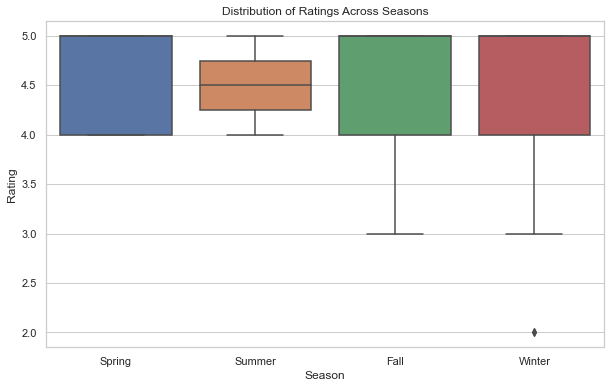

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting up the aesthetics for the plot
sns.set(style="whitegrid")

# Creating a boxplot to visualize the distribution of ratings across seasons
plt.figure(figsize=(10, 6))
sns.boxplot(x='Season', y='Numeric Rating', data=df, order=['Spring', 'Summer', 'Fall', 'Winter'])

plt.title('Distribution of Ratings Across Seasons')
plt.xlabel('Season')
plt.ylabel('Rating')

plt.show()


In [32]:
df = pd.DataFrame(filtered_entries)

# Convert the 'Date' column to datetime objects
df['Date'] = pd.to_datetime(df['Date'])

# Define a function to convert months to seasons
def month_to_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Fall'

# Apply the function to the 'Date' column to create a new 'Season' column
df['Season'] = df['Date'].dt.month.apply(month_to_season)

# Assuming 'Rating' column contains string values like '5 star rating', we extract the numeric part
df['Numeric Rating'] = df['Rating'].apply(lambda x: float(x.split()[0]))

# Group by 'Season' and count the number of reviews
review_counts_by_season = df['Season'].value_counts()

# Calculate the average rating per season
average_rating_by_season = df.groupby('Season')['Numeric Rating'].mean()

# Combine review counts and average ratings into a single DataFrame
seasonal_popularity = pd.DataFrame({
    'Review Count': review_counts_by_season, 
    'Average Rating': average_rating_by_season
}).sort_values('Review Count', ascending=False)

# The season with the most reviews is the most popular
most_popular_season = seasonal_popularity.index[0]

seasonal_popularity, most_popular_season

(        Review Count  Average Rating
 Winter            32        4.687500
 Fall              10        3.800000
 Summer             7        4.857143
 Spring             1        5.000000,
 'Winter')